In [1]:
## Import packages

import os # something very general

import matplotlib.pyplot as plt     #for plotting
from matplotlib.cm import get_cmap

import cartopy.crs as crs    #for geography maps
from cartopy.feature import NaturalEarthFeature

from netCDF4 import Dataset   #netCDF4 library and wrf-python
from wrf import (getvar, ALL_TIMES)

import xarray as xr



In [75]:
## Define my own custom filepath, from where I should ingest wrf data
myPath   = r'/home/olddog/Documents/Python_Scipts/WRF_nesting_prediction_Web/dataTest'
filename = 'wrfout_d03_2022-05-07_01:00:00'
## Read in the file
ncfile = Dataset(os.path.join(myPath, filename))

In [127]:


varname = 'p'
# 
data = getvar(ncfile, varname, timeidx=ALL_TIMES)

### Start Slicing the data, based on their index

In [128]:
### Start slicing data, using index selection
nz = 0
sliced = data.isel(bottom_top=nz, Time=10)


### First Attempt to produce a map-plot 

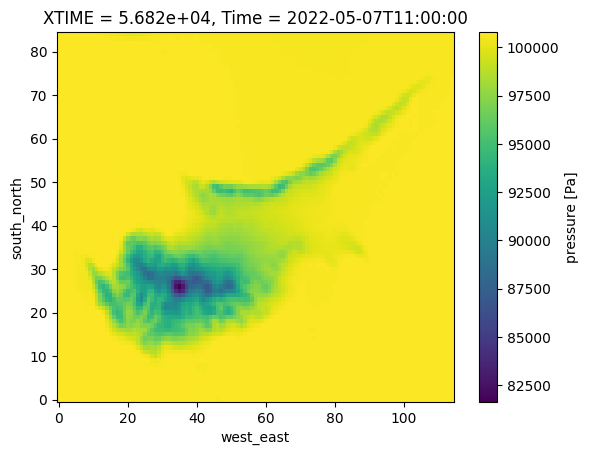

In [129]:
sliced.plot()

In [133]:
del sliced

However, in the plot above there are many aspects that seem to be wrong, or can be improved. They are: 
1. Latitude and Longitude are wrong (btw., try to explain why?). 
2. Pressure units are in Pascal, instead of hPa as commonly encountered in literature, which also makes it harder to read. 
3. The title can be improved.
4. There is no coastline.


Let us try solving all the points above to, then, replot an improved version! 

### Process and adjust

In [134]:
sliced = data.isel(bottom_top=0, Time=10)
sliced = sliced/100                     # convert from Pa to hPa
sliced.attrs['units'] = 'hPa'          # update units
sliced.XLONG['name'] = 'longitude'

### Plot final result, greatly improved

Text(0.5, 1.0, 'Variable pressure, at time 2022-05-07T11\nVertical Level index: 0')

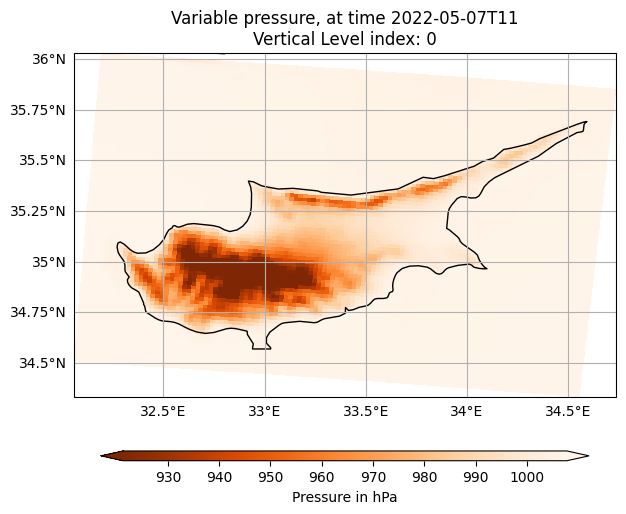

In [135]:
plt.figure(figsize=(7, 7))
ax = plt.axes(projection=crs.PlateCarree())

cbar_kwargs = {'orientation':'horizontal', 'shrink':0.9, 'aspect':50, 'pad':.1 , 'label':'Pressure in hPa'}
sliced.plot(x='XLONG', y='XLAT',ax=ax, robust=True, cmap = 'Oranges_r', cbar_kwargs=cbar_kwargs)

ax.coastlines(resolution='10m')
gl = ax.gridlines(draw_labels=True)
gl.top_labels = False
gl.right_labels = False


title_string = "Variable {}, at time {}\nVertical Level index: {}".format(sliced.name, str(sliced.Time.values).split(':')[0], nz)
ax.set_title(title_string)